## Case study
The client wants to better understand user behavior and improve its ecommerce platform. The management has identified several scenarios where more data could be helpful:
* Identify top products based on the total transaction revenue per day.
* Detect any anomalies, such as a sharp decrease or increase in the number of transactions for a specific product.
* Identify the most profitable city or province based on the total transaction revenue.

## Dataset
The dataset it's a part of the 'data-to-insights.ecommerce.all_sessions' dataset from Google Big Query. This dataset includes visitor ID, visit time, product SKU, product name, transaction count, city, province, and more.

## Tasks
1. solve the case study using ChatGPT as an assistant. For this, you need to document the prompt you are giving to ChatGPT, the results produced by ChatGPT, and your analysis of these results. 
2. improve upon the solution provided by ChatGPT. This involves analyzing the solution generated by ChatGPT, identifying areas for improvement, and implementing these enhancements. These could be in terms of data processing, accuracy of the analysis, visualization, handling edge cases, or anything else that you think would lead to a better solution. Justify why these improvements are necessary and how they contribute to a more comprehensive understanding of the data.


# ChatGPT


Prompt:
```
help me to understand user behavior and improve its ecommerce platform such as
1. Identify top products based on the total transaction revenue per day.
2. Detect any anomalies, such as a sharp decrease or increase in the number of transactions for a specific product.
3. Identify the most profitable city or province based on the total transaction revenue.
based on ecommerce_all_sessions.csv which contains columns:
1. channelGrouping: The channel or source through which the user accessed the website or made a visit, such as "Organic Search," "Paid Search," "Direct," etc.
2. country: The country from which the visitor or customer is accessing the website.
3. fullVisitorId: A unique identifier for the visitor or customer. It typically represents a single user.
4. timeOnSite: The total time the visitor spent on the website during a session, typically measured in seconds.
5. pageviews: The number of pages viewed by the visitor during their visit.
6. sessionQualityDim: A dimension or score indicating the quality or engagement level of the session.
7. v2ProductName: The name or description of a product or service.
8. productRevenue: The revenue generated from the sale of a product or service.
9. productQuantity: The quantity of a product or service purchased.
10. productRefundAmount: The amount refunded for a product or service.
using python script
```


Result ChatGPT

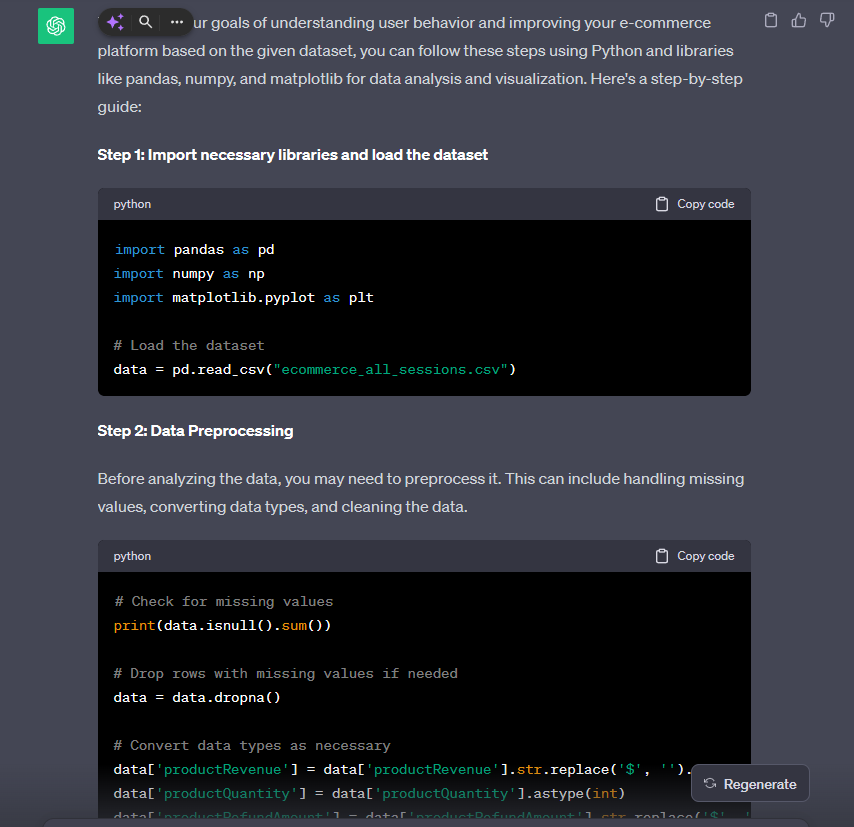

## Import necessary libraries and load the dataset

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Load the dataset
data = pd.read_csv("ecommerce-session-bigquery.csv")

##  Data Preprocessing

In [27]:
# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values if needed (Not implement)
# data = data.dropna()

# Convert necessary column
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')

fullVisitorId                  0
channelGrouping                0
time                           0
country                        0
city                           0
totalTransactionRevenue     9381
transactions                9372
timeOnSite                   287
pageviews                      1
sessionQualityDim           9981
date                           0
visitId                        0
type                           0
productRefundAmount        10000
productQuantity             9955
productPrice                   0
productRevenue              9955
productSKU                     0
v2ProductName                  0
v2ProductCategory              0
productVariant                 0
currencyCode                 386
itemQuantity               10000
itemRevenue                10000
transactionRevenue         10000
transactionId              10000
pageTitle                     92
searchKeyword              10000
pagePathLevel1                 0
eCommerceAction_type           0
eCommerceA

## Identify Top Products by Total Transaction Revenue per Day

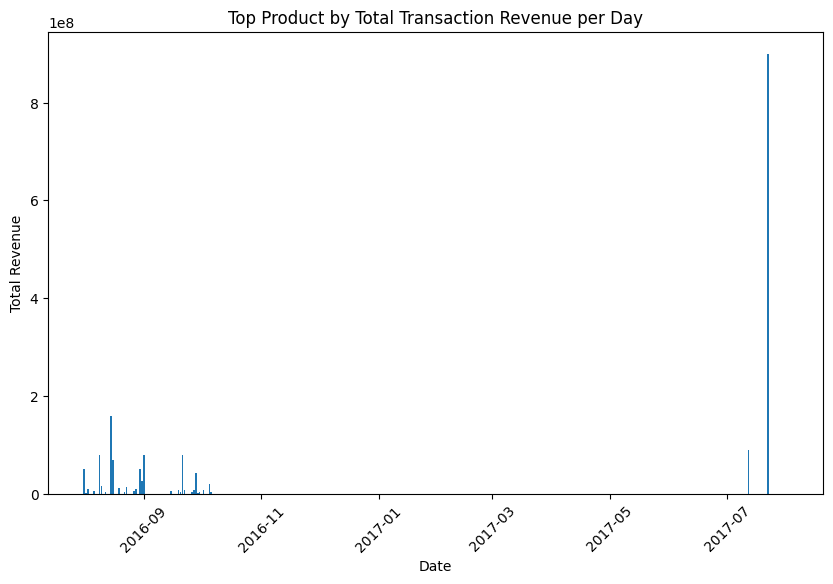

In [28]:
# Group data by v2ProductName and date, then calculate the sum of productRevenue
top_products = data.groupby(['v2ProductName', 'date'])['productRevenue'].sum().reset_index()

# Sort the data by revenue in descending order
top_products = top_products.sort_values(by='productRevenue', ascending=False)

# Get the top product for each day
top_product_per_day = top_products.groupby('date').first()

# Visualize the top product
plt.figure(figsize=(10, 6))
plt.bar(top_product_per_day.index, top_product_per_day['productRevenue'])
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.title('Top Product by Total Transaction Revenue per Day')
plt.xticks(rotation=45)
plt.show()

## Detect Anomalies in Transaction Count for Specific Products

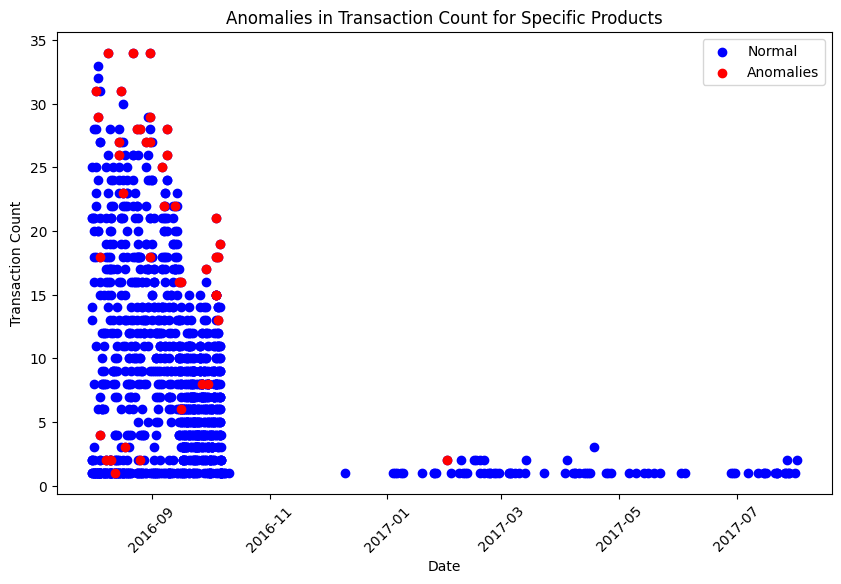

In [29]:
# Group data by product and date, then calculate the number of transactions
product_transaction_count = data.groupby(['v2ProductName', 'date'])['fullVisitorId'].count().reset_index()

# Calculate Z-scores for transaction counts
product_transaction_count['z_score'] = (product_transaction_count.groupby('v2ProductName')['fullVisitorId'].transform(lambda x: (x - x.mean()) / x.std()))

# Define a threshold for anomaly detection (e.g., Z-score > 2 or < -2)
anomalies = product_transaction_count[abs(product_transaction_count['z_score']) > 2]

# Visualize anomalies
plt.figure(figsize=(10, 6))
plt.scatter(product_transaction_count['date'], product_transaction_count['fullVisitorId'], c='b', label='Normal')
plt.scatter(anomalies['date'], anomalies['fullVisitorId'], c='r', label='Anomalies')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.title('Anomalies in Transaction Count for Specific Products')
plt.legend()
plt.xticks(rotation=45)
plt.show()


##  Identify the Most Profitable City or Province

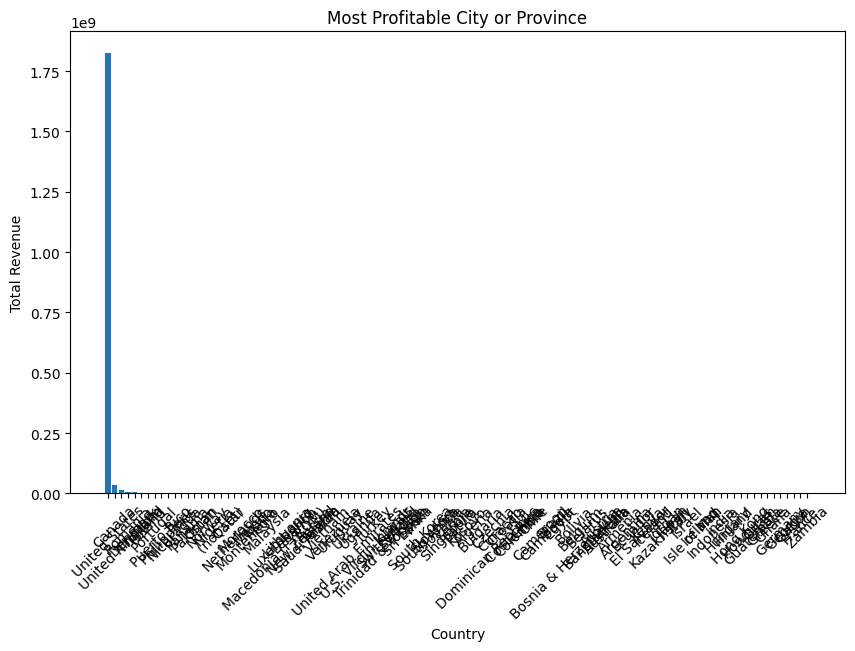

In [30]:
# Group data by country and calculate the total transaction revenue
profitable_cities = data.groupby('country')['productRevenue'].sum().reset_index()

# Sort the data by revenue in descending order
profitable_cities = profitable_cities.sort_values(by='productRevenue', ascending=False)

# Visualize the most profitable city or province
plt.figure(figsize=(10, 6))
plt.bar(profitable_cities['country'], profitable_cities['productRevenue'])
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.title('Most Profitable City or Province')
plt.xticks(rotation=45)
plt.show()


# Enchancement


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Load the dataset
data = pd.read_csv("ecommerce-session-bigquery.csv")

In [33]:
# Check data schema
print("Check data info \n", data.info())

# Check for missing values
print("\nCheck missing value \n", data.isnull().sum())

# Convert necessary column
data['date']            = pd.to_datetime(data['date'], format='%Y%m%d')
data['productRevenue']  = data['productQuantity'] * data['productPrice']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   fullVisitorId            10000 non-null  uint64        
 1   channelGrouping          10000 non-null  object        
 2   time                     10000 non-null  int64         
 3   country                  10000 non-null  object        
 4   city                     10000 non-null  object        
 5   totalTransactionRevenue  619 non-null    float64       
 6   transactions             628 non-null    float64       
 7   timeOnSite               9713 non-null   float64       
 8   pageviews                9999 non-null   float64       
 9   sessionQualityDim        19 non-null     float64       
 10  date                     10000 non-null  datetime64[ns]
 11  visitId                  10000 non-null  int64         
 12  type                     10000 no

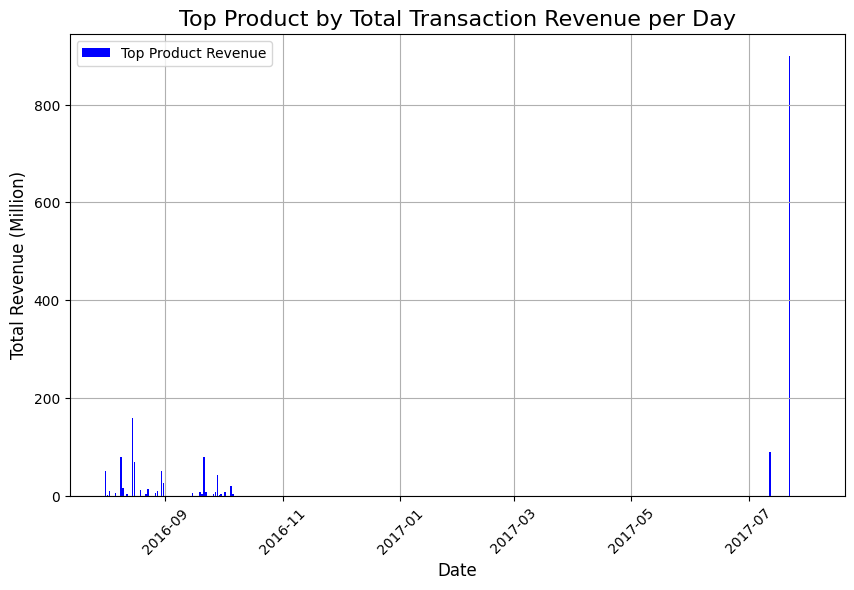

In [49]:
# Group data by v2ProductName and date, then calculate the sum of productRevenue
top_products = data.groupby(['v2ProductName', 'date']).agg({'productRevenue':'sum'}).reset_index()

# Sort the data by revenue in descending order, and keep only the top product for each day
top_products = top_products.sort_values(by='productRevenue', ascending=False).groupby('date').head(1)

# Visualize the top product
plt.figure(figsize=(10, 6))
plt.bar(top_products['date'], top_products['productRevenue']/1e6, color='blue')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Revenue (Million)', fontsize=12)
plt.title('Top Product by Total Transaction Revenue per Day', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(['Top Product Revenue'])

plt.show()

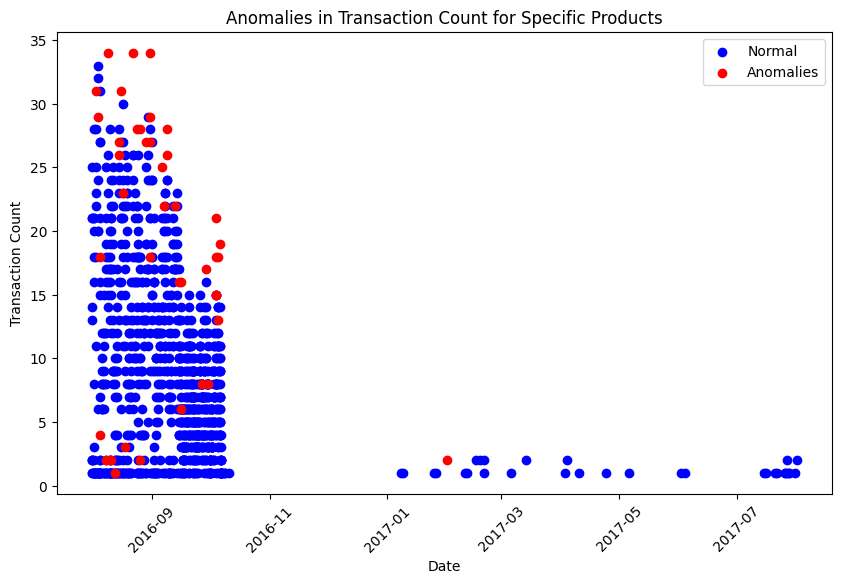

In [50]:
# Group data by product and date, calculate transaction count
product_transaction_count = (
    data.groupby(["v2ProductName", "date"])["fullVisitorId"]
    .count()
    .reset_index()
    .rename(columns={"fullVisitorId": "transaction_count"})
)

# Calculate Z-scores for transaction counts
product_transaction_count["z_score"] = (
    product_transaction_count.groupby("v2ProductName")["transaction_count"]
    .transform(lambda x: (x - x.mean()) / x.std())
)

# Define anomaly threshold (e.g., Z-score > 2 or < -2)
anomaly_threshold = 2

# Identify anomalies based on Z-score threshold
anomalies = product_transaction_count[abs(product_transaction_count["z_score"]) > anomaly_threshold]

# Visualize anomalies
plt.figure(figsize=(10, 6))
normal_data = product_transaction_count[product_transaction_count["z_score"].abs() <= anomaly_threshold]
plt.scatter(normal_data["date"], normal_data["transaction_count"], c="b", label="Normal")
plt.scatter(anomalies["date"], anomalies["transaction_count"], c="r", label="Anomalies")
plt.xlabel("Date")
plt.ylabel("Transaction Count")
plt.title("Anomalies in Transaction Count for Specific Products")
plt.legend()
plt.xticks(rotation=45)
plt.show()

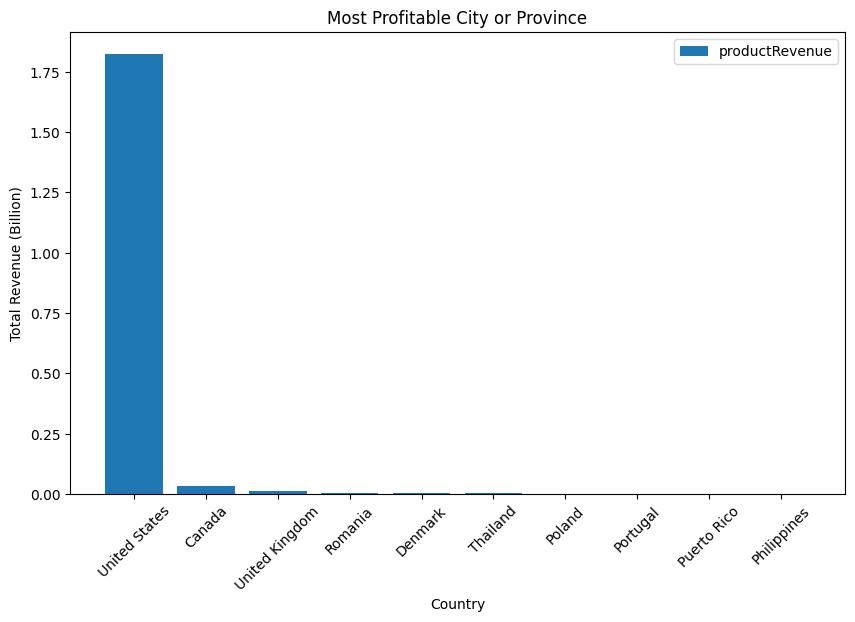

In [54]:
# Group data by country and calculate the total transaction revenue
profitable_cities = data.groupby('country')['productRevenue'].sum().reset_index()

# Sort and filter the data to keep only the most profitable country
top_country = profitable_cities.sort_values(by='productRevenue', ascending=False).head(10)

# Visualize the most profitable city or province
plt.figure(figsize=(10, 6))
plt.bar(top_country['country'], top_country['productRevenue']/1e9)
plt.xlabel('Country')
plt.ylabel('Total Revenue (Billion)')
plt.title('Most Profitable City or Province')
plt.xticks(rotation=45)
plt.legend(['productRevenue'])
plt.show()